In [1]:
import pandas as pd
import numpy as np
#import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }


# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


# Prediction Visualizations (enrich vs burnup)

## Rando data set

In [3]:
trainXY = pd.read_pickle("../../prep-pkls/nucmoles_opusupdate_aug2019/not-scaled_fissact.pkl")

In [4]:
trainXY.sample(2)

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba138,ce140,ce142,ce144,cs133,...,xe131,xe132,xe134,xe136,y89,zr91,zr92,zr93,zr94,zr96
8.397e+02.1,29388.62,0.000561,4.1,ce16x16,pwr,8.334,7.662,6.973,0.0,7.659,...,0.000,7.324,10.060,15.180,4.026,5.091,6.002,6.610,7.030,7.364
8.502e+02,13707.90,301.898343,0.5,atrium10x10-9,bwr,4.075,3.882,3.486,0.0,3.980,...,1.686,2.980,4.827,6.993,2.559,3.185,3.359,3.599,3.723,3.747


In [5]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000.0

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

/home/opotowsky/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 432x288 with 0 Axes>

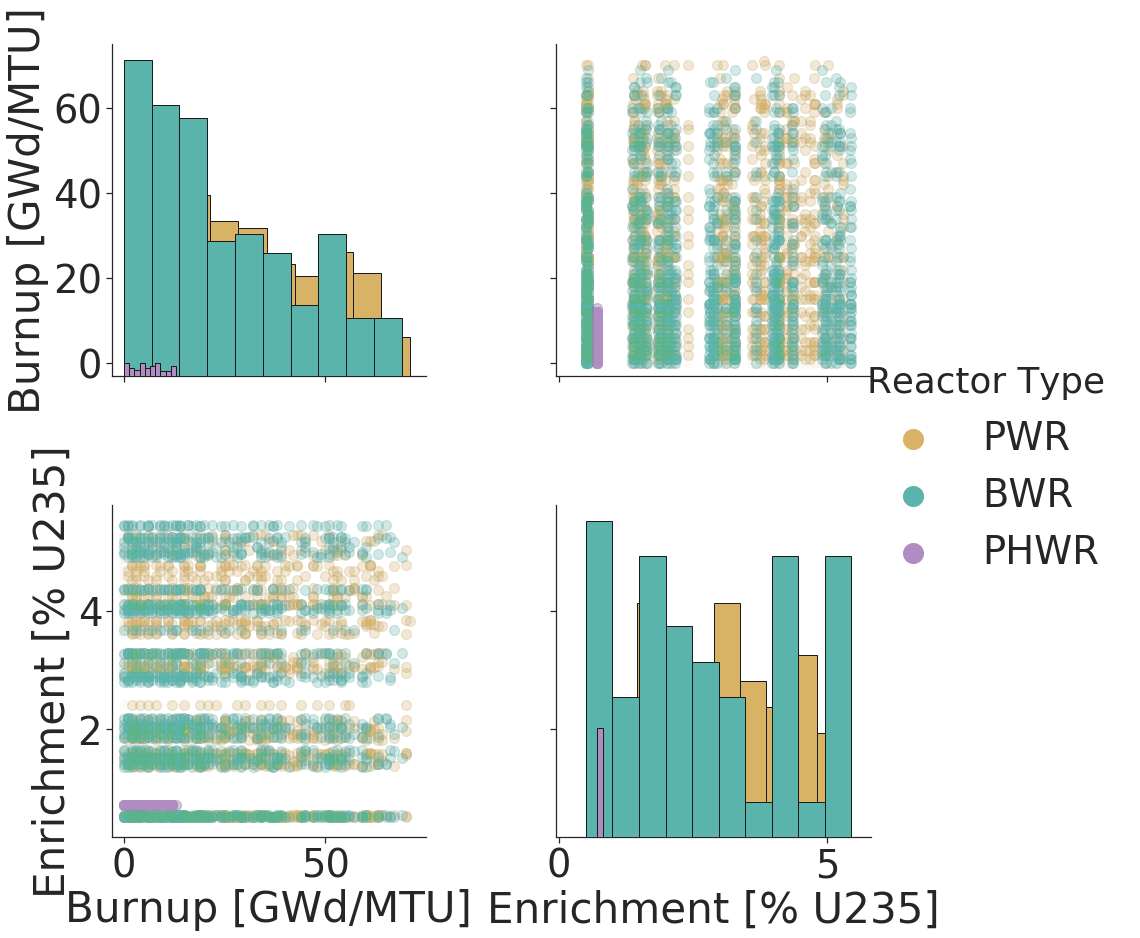

In [6]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=100, alpha=0.03)
g.axes[0,0].set_ylim(-3, 75)
g.axes[1,0].set_xlim(-3, 75)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)

#g.savefig('3train_set.png', bbox_inches='tight', transparent=True)

<Figure size 432x288 with 0 Axes>

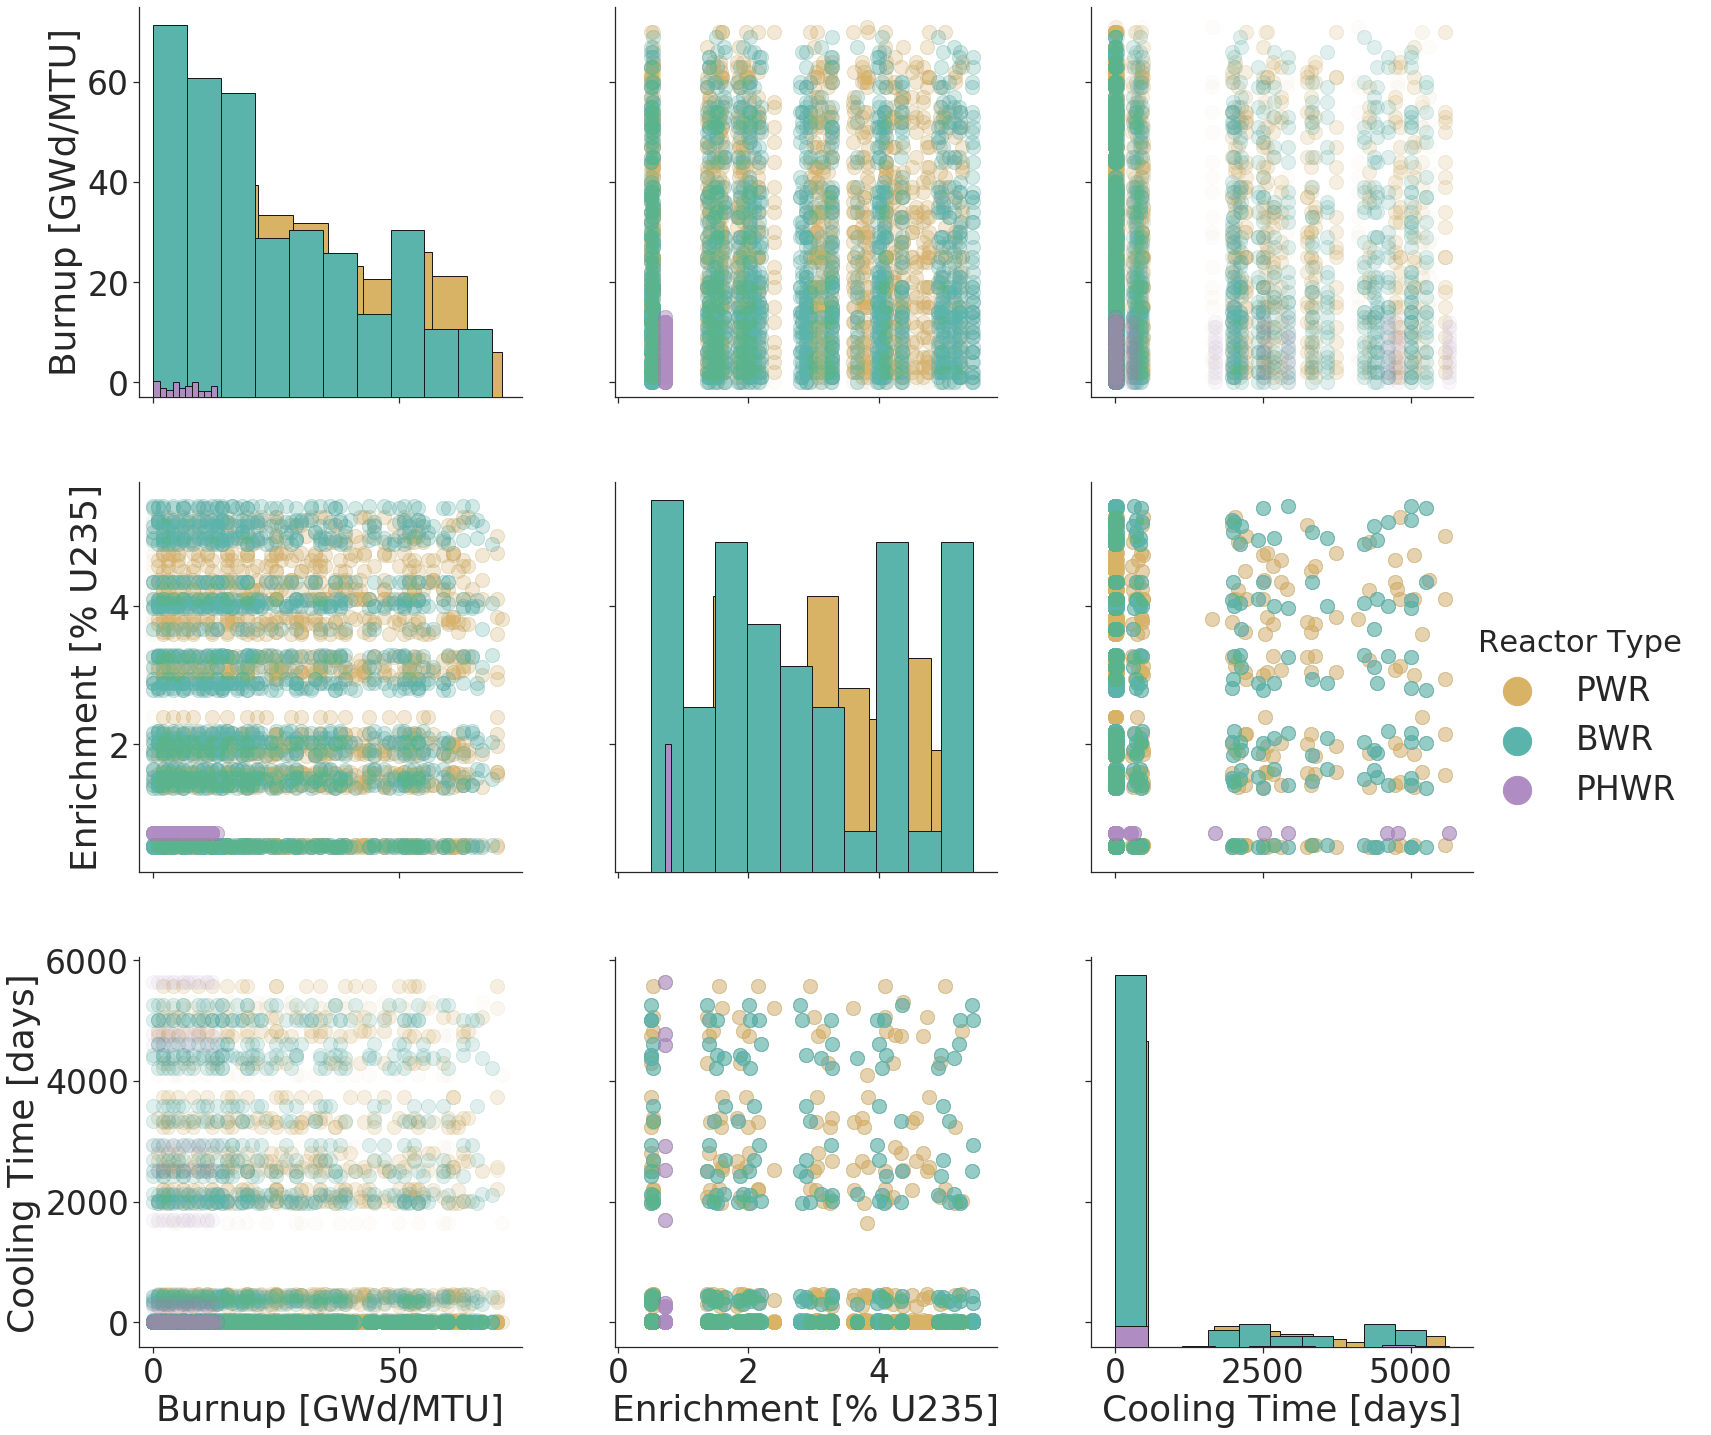

In [7]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name, cool_name]]
g = sns.set(style="ticks", font_scale=3)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=200, alpha=0.03)
g.axes[0,0].set_ylim(-3, 75)
g.axes[2,0].set_xlim(-3, 75)
#g.axes[2,0].set_ylim(-200, 6000)
#g.axes[2,2].set_xlim(-200, 6000)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)
    
g.savefig('histogram_opusupdate_trainset.png', bbox_inches='tight', transparent=True)

## Low burnup data set

In [52]:
trainXY = pd.read_pickle("../pkl_trainsets/2jul2018/2jul2018_trainset1_nucs_fissact_not-scaled.pkl")

In [53]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

In [54]:
#x = len(trainXY.columns)-4
## if labels are @ end of df
#dfX = trainXY.iloc[:, 5:x]
#dfY_r = trainXY.iloc[:, x]
#dfY_c = trainXY.iloc[:, x+1]
#dfY_e = trainXY.iloc[:, x+2]
#dfY_b = trainXY.iloc[:, x+3]
#dfX.head()

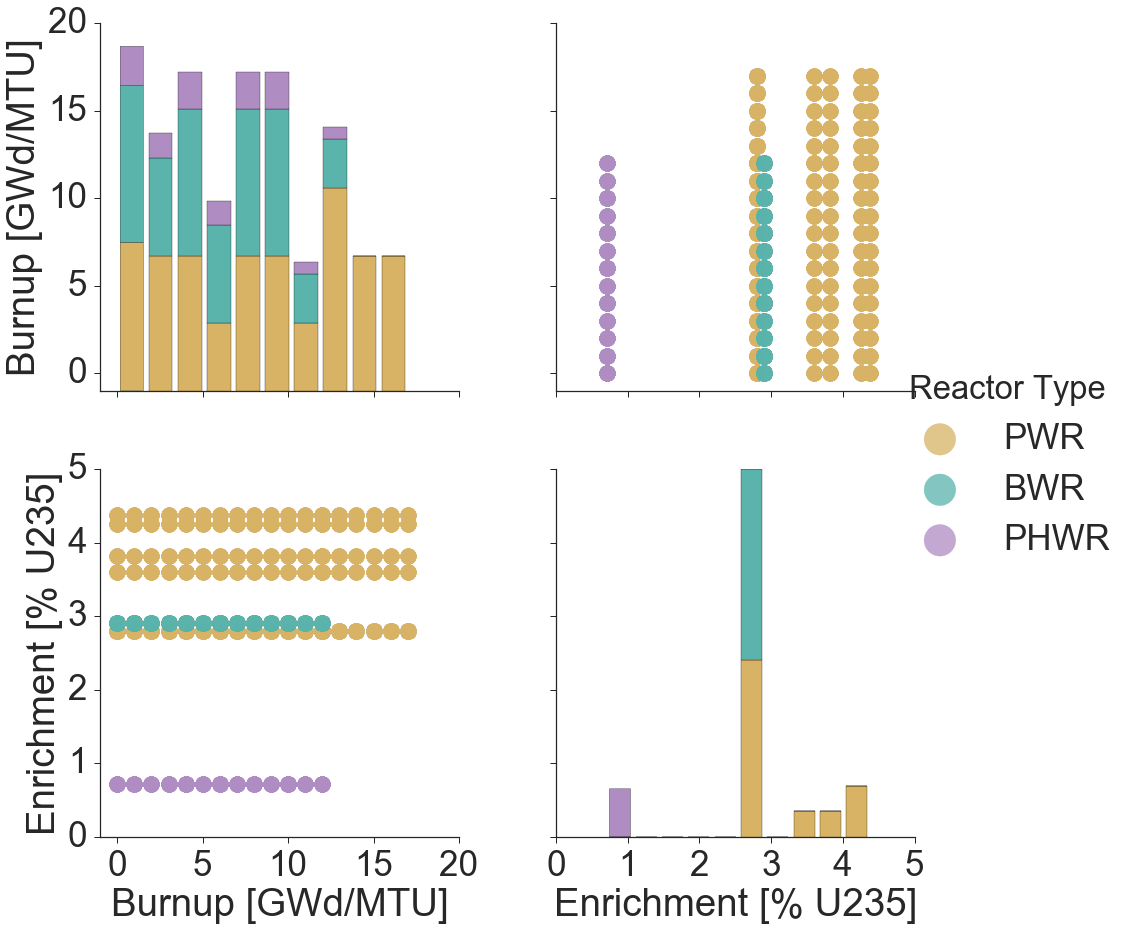

In [55]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(-1, 20)
g.axes[1,0].set_xlim(-1, 20)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('1train_set.png', bbox_inches='tight', transparent=True)

## SFCOMPO data set

In [28]:
trainXY = pd.read_pickle("../pkl_trainsets/2jul2018/2jul2018_trainset2_nucs_fissact_not-scaled.pkl")

In [29]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000.0

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

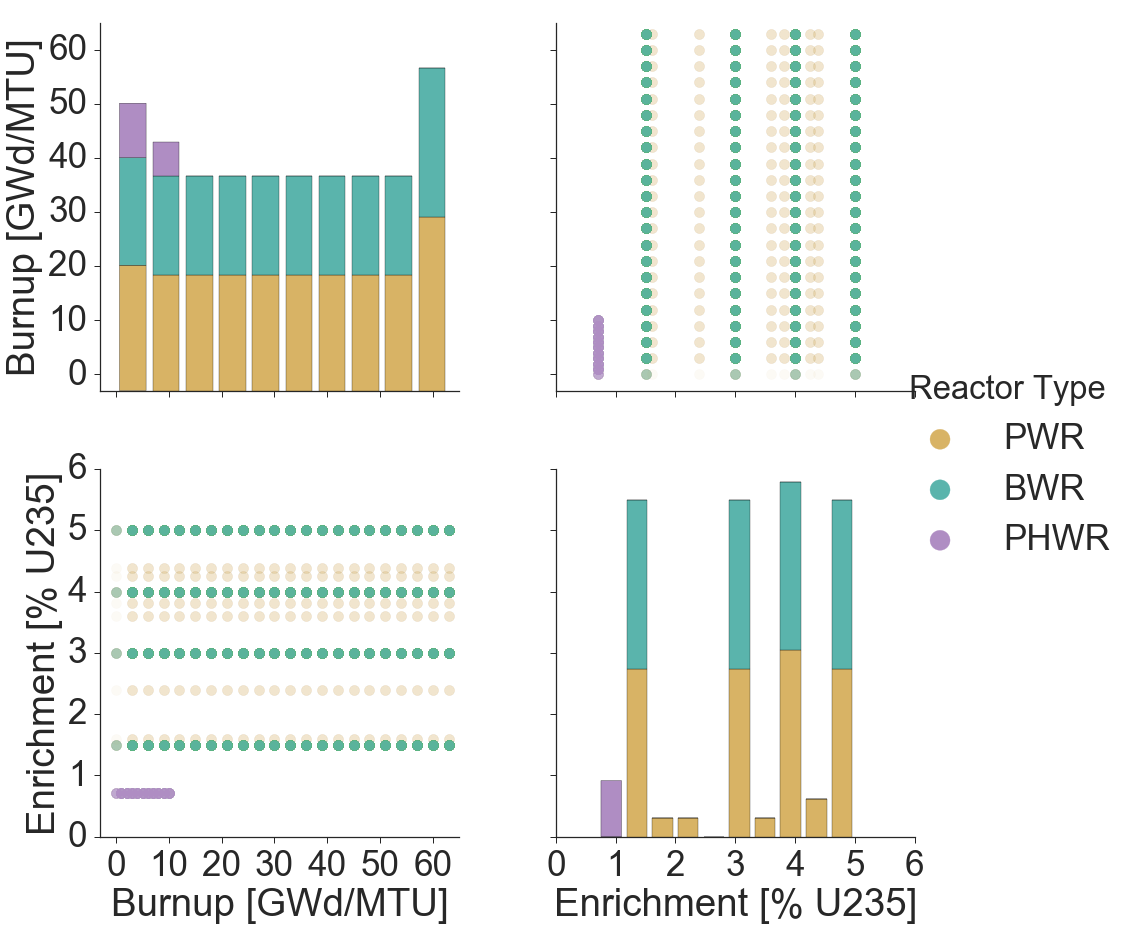

In [30]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=100, alpha=0.06)
g.axes[0,0].set_ylim(-3, 65)
g.axes[1,0].set_xlim(-3, 65)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)

g.savefig('2train_set.png', bbox_inches='tight', transparent=True)

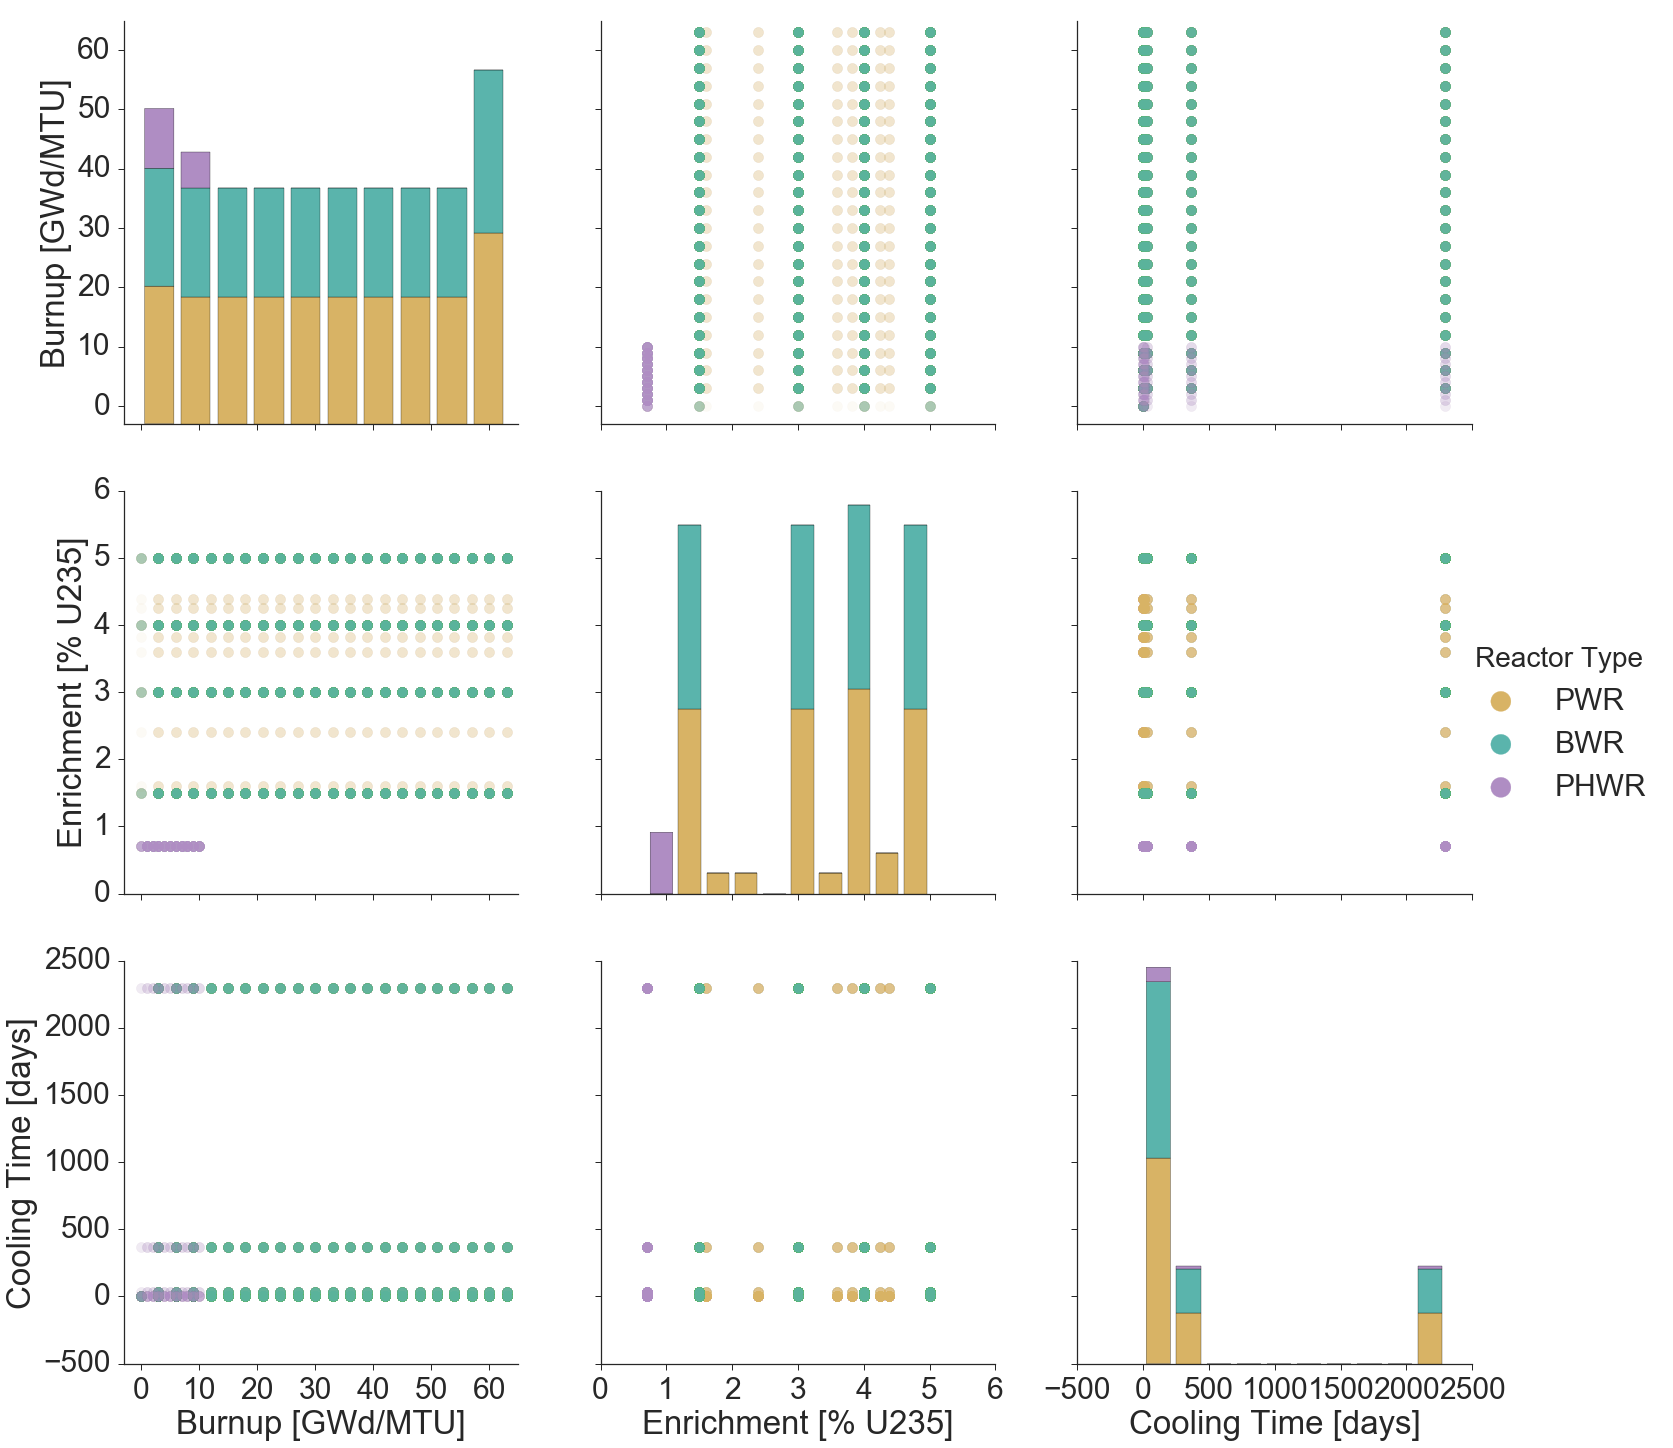

In [31]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name, cool_name]]
g = sns.set(style="ticks", font_scale=3)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=100, alpha=0.06)
g.axes[0,0].set_ylim(-3, 65)
g.axes[1,0].set_xlim(-3, 65)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for lh in g._legend.legendHandles: lh.set_alpha(1)
    
g.savefig('2train_set_allparams.png', bbox_inches='tight', transparent=True)